# Графики функций

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

Рассмотрены следующие функции:
- хорошо обусловленная (µ ≃ 1) двумерная квадратичная функция;
- плохо обусловленная (µ > 10) двумерная квадратичная функция;
- функция Розенброка.

In [2]:
from functions.functions_under_study import f_well, f_poor, f_rozen, grad_well, grad_poor, grad_rozen, func_mtrx
from functions.optimization import momentum_descent, nesterov_descent, adagrad_descent, rmsprop_descent, adadelta_descent

In [3]:
x1_min = -10.0
x1_max = 10.0
x2_min = -10.0
x2_max = 10.0
N = 1000

x = np.empty((2,), dtype=object)
x[0] = np.linspace(x1_min, x1_max, N)
x[1] = np.linspace(x2_min, x2_max, N)
X, Y = np.meshgrid(x[0], x[1])

func_names = [f_well, f_poor, f_rozen]
grad_names = [grad_well, grad_poor, grad_rozen]
func_labels = ['Well-conditioned',
               'Poorly-conditioned',
               'Rosenbrock']

N_FUNC = len(func_names)

Z = np.empty((N_FUNC,), dtype=object)

for k, func in enumerate(func_names):
    Z[k] = func([X, Y])

Настройки форматирования графиков.

In [4]:
user_figsize = (10,5)
user_fontsize = 14
user_tickfontsize = 12

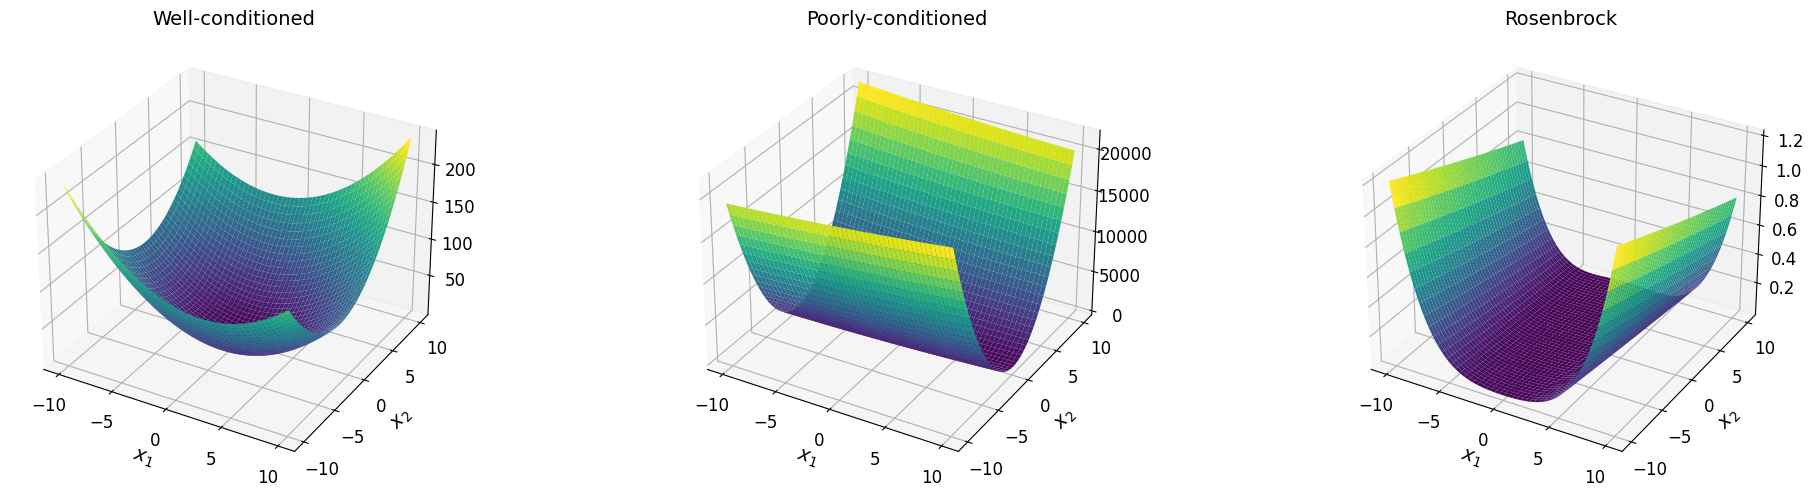

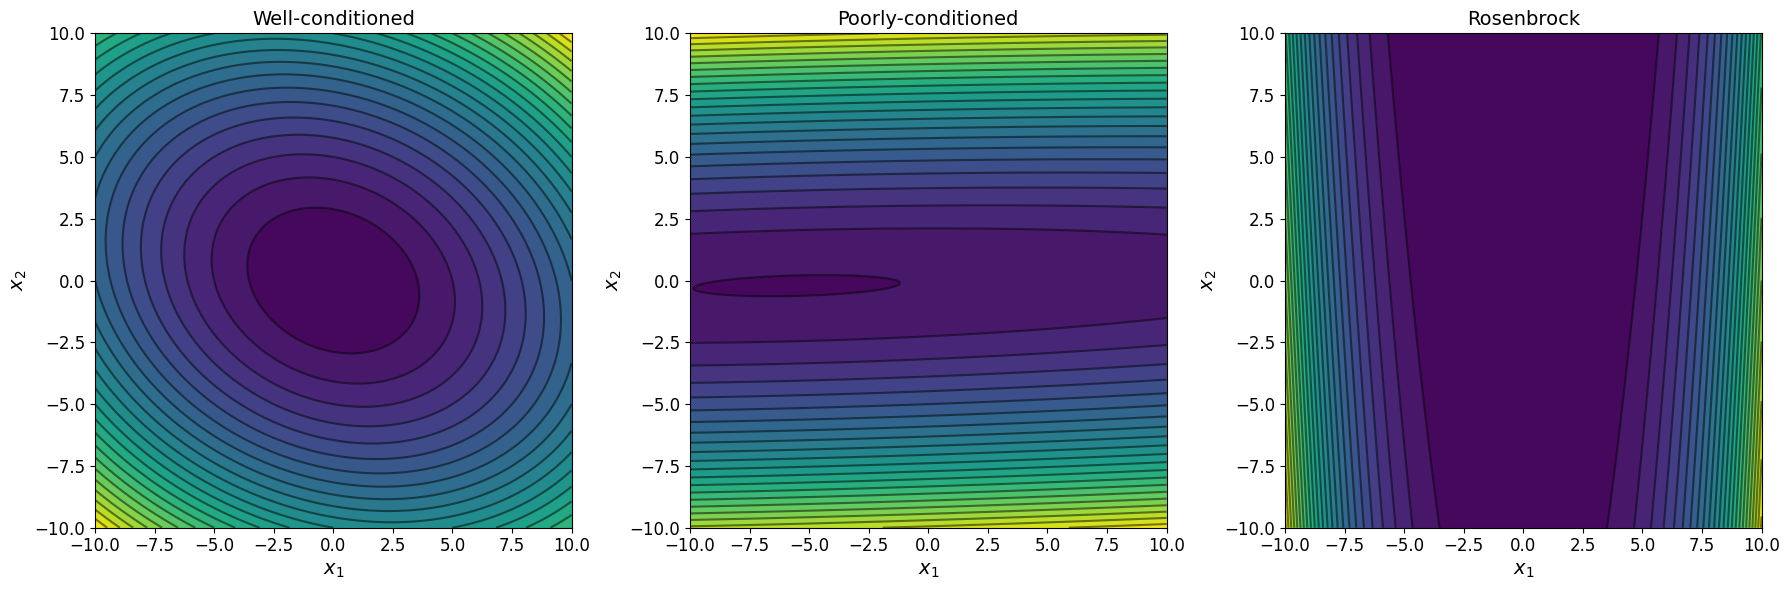

In [5]:
fig, axs = plt.subplots(ncols=N_FUNC, nrows=1, figsize=(7*N_FUNC, 5), subplot_kw={'projection': '3d'})
for k, z, func_lbl in zip(range(N_FUNC), Z, func_labels):
    axs[k].plot_surface(X, Y, z, cmap='viridis', edgecolor='none')    
    axs[k].set_xlabel('$x_1$', fontsize=user_fontsize)
    axs[k].set_ylabel('$x_2$', fontsize=user_fontsize)
    axs[k].set_title(func_lbl, fontsize=user_fontsize)
    
    axs[k].tick_params(axis='x', labelsize=user_tickfontsize)
    axs[k].tick_params(axis='y', labelsize=user_tickfontsize)
    axs[k].tick_params(axis='z', labelsize=user_tickfontsize)
plt.tight_layout()
plt.savefig('readme_img/func_img/3D_plots.png', bbox_inches='tight')
plt.show()

fig, axs = plt.subplots(ncols=N_FUNC, nrows=1, figsize=(6*N_FUNC, 6))
for k, z, func_lbl in zip(range(N_FUNC), Z, func_labels):
    contour = axs[k].contour(X, Y, z, levels=25, colors='black', alpha=0.5)
    axs[k].contourf(X, Y, z, levels=25, cmap='viridis')
    axs[k].set_xlabel('$x_1$', fontsize=user_fontsize)
    axs[k].set_ylabel('$x_2$', fontsize=user_fontsize)
    axs[k].set_title(func_lbl, fontsize=user_fontsize)
    
    axs[k].tick_params(axis='x', labelsize=user_tickfontsize)
    axs[k].tick_params(axis='y', labelsize=user_tickfontsize)
plt.tight_layout()
plt.savefig('readme_img/func_img/countour_plots.png', bbox_inches='tight')
plt.show()

In [12]:
# Начальное приближение.
x_init = np.array([-2.2, -2.2])
# Tolerance.
eps = 1e-5

In [ ]:
x_optim, trajectory, iter_counter, _, _ = adadelta_descent(
    grad_func=grad_rozen,
    x_init=x_init,
    beta=0.95,
    eps_zero=1e-8,
    tolerance=1e-3,
    printoutput=False
    )
print(x_optim)
print(iter_counter)

[-5.6167101  -0.04720164]
10000000


In [ ]:
x_optim, trajectory, iter_counter, _, _ = momentum_descent(
    grad_func=grad_rozen,
    x_init=x_init,
    learning_rate=1e-5,
    beta = 0.9,
    tolerance=eps,
    printoutput=False
    )
print(x_optim)
print(iter_counter)

[0.99998882 0.9999776 ]
2556355


In [7]:
x_optim, trajectory, iter_counter, _, _ = nesterov_descent(
    grad_func=grad_rozen,
    x_init=x_init,
    learning_rate=1e-5,
    beta = 0.9,
    tolerance=eps,
    printoutput=False
    )
print(x_optim)
print(iter_counter)

KeyboardInterrupt: 

In [ ]:
x_optim, trajectory, iter_counter, _, _ = adagrad_descent(
    grad_func=grad_rozen,
    x_init=x_init,
    learning_rate=1e-1,
    tolerance=1e-3,
    printoutput=False
    )
print(x_optim)
print(iter_counter)

[0.9990254  0.99804894]
1651141


In [ ]:
x_optim, trajectory, iter_counter, _, _ = rmsprop_descent(
    grad_func=grad_rozen,
    x_init=x_init,
    learning_rate=1e-1,
    beta=0.99,
    tolerance=1e-3,
    printoutput=False
    )
print(x_optim)
print(iter_counter)

KeyboardInterrupt: 

## Траектории

In [11]:
method_names = [momentum_descent, nesterov_descent, adagrad_descent, rmsprop_descent, adadelta_descent]
N_METH = len(method_names)

In [12]:
x_optim_arr = np.empty((N_FUNC, N_METH), dtype=object)
trajectory_arr = np.empty((N_FUNC, N_METH), dtype=object)
iter_counter_arr = np.empty((N_FUNC, N_METH), dtype=object)

# Начальное приближение.
x_init = np.array([-2.2, -2.2])
# Tolerance.
eps = 1e-3
for mdx, meth in enumerate(method_names):
    for ndx, func, grad in zip(range(N_FUNC), func_names, grad_names):
        match meth.__name__:
            case 'momentum_descent' | 'nesterov_descent':
                x_optim, trajectory, iter_counter, _, _ = meth(
                    grad_func=grad,
                    x_init=x_init,
                    learning_rate=1e-5,
                    beta = 0.9,
                    tolerance=eps,
                    printoutput=False
                    )
            
            case 'adagrad_descent':
                x_optim, trajectory, iter_counter, _, _ = meth(
                    grad_func=grad,
                    x_init=x_init,
                    learning_rate=1e-1,
                    tolerance=eps,
                    printoutput=False
                    )
            
            case 'rmsprop_descent':
                x_optim, trajectory, iter_counter, _, _ = meth(
                    grad_func=grad,
                    x_init=x_init,
                    learning_rate=1e-1,
                    beta=0.99,
                    tolerance=eps,
                    printoutput=False
                    )
            case 'adadelta_descent':
                x_optim, trajectory, iter_counter, _, _ = meth(
                    grad_func=grad,
                    x_init=x_init,
                    beta=0.95,
                    tolerance=eps,
                    printoutput=False
                    )
                       
        x_optim_arr[ndx, mdx] = x_optim
        trajectory_arr[ndx, mdx] = np.array(trajectory)
        iter_counter_arr[ndx, mdx] = iter_counter

Well-conditioned


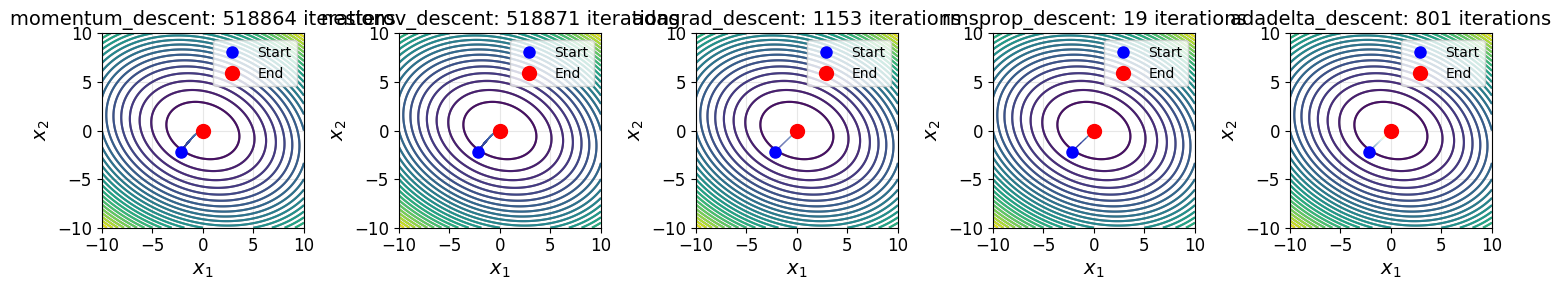

Poorly-conditioned


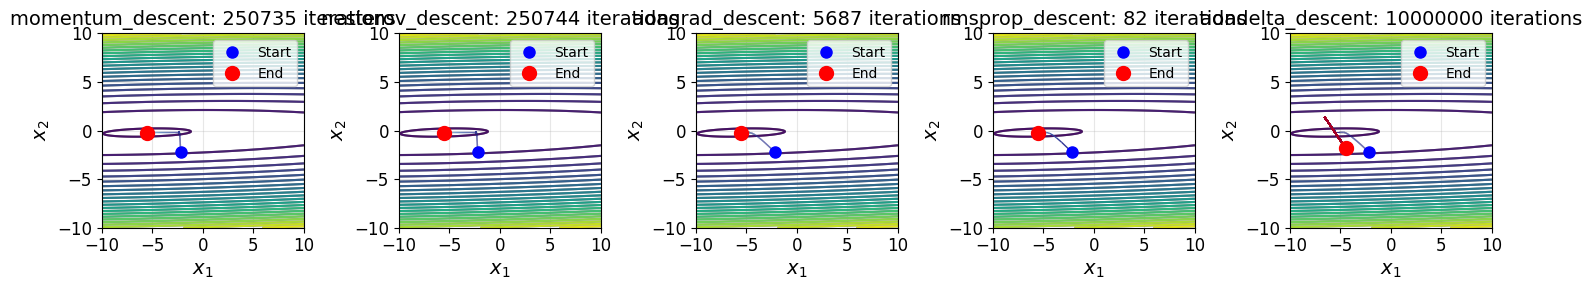

Rosenbrock


MemoryError: Unable to allocate 305. MiB for an array with shape (10000000, 4) and data type float64

Error in callback <function _draw_all_if_interactive at 0x0000020013B05B20> (for post_execute):


MemoryError: Unable to allocate 42.8 MiB for an array with shape (1403927, 4) and data type float64

MemoryError: Unable to allocate 10.7 MiB for an array with shape (1403927,) and data type float64

<Figure size 1500x300 with 5 Axes>

In [13]:
for ndx, z, func_lbl in zip(range(N_FUNC), Z, func_labels):
    print(func_lbl)
    fig, axs = plt.subplots(ncols=N_METH, nrows=1, figsize=(3*N_METH, 3))
    for mdx, ax in enumerate(axs):
        contour = ax.contour(X, Y, z, levels=25, colors='black', alpha=0.5)
        ax.contour(X, Y, z, levels=25, cmap='viridis')
        ax.set_xlabel('$x_1$', fontsize=user_fontsize)
        ax.set_ylabel('$x_2$', fontsize=user_fontsize)
        ax.set_title(method_names[mdx].__name__ + ': ' + str(iter_counter_arr[ndx,mdx]) + ' iterations', fontsize=user_fontsize)
        
        # Подготовка сегментов для LineCollection
        points = np.array([trajectory_arr[ndx,mdx][:, 0], trajectory_arr[ndx,mdx][:, 1]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # Создание LineCollection с цветами, зависящими от индекса (шага)
        lc = LineCollection(segments, cmap='RdYlBu_r', linewidth=1.0)
        lc.set_array(np.linspace(0, 1, len(segments))) # цвет от 0 (начало) до 1 (конец)
        line = ax.add_collection(lc)
        
        # Отмечаем точки
        ax.plot(x_init[0], x_init[1], 'bo', markersize=8, label='Start')
        ax.plot(x_optim_arr[ndx,mdx][0], x_optim_arr[ndx,mdx][1], 'ro', markersize=10, label='End')
            
        ax.tick_params(axis='x', labelsize=user_tickfontsize)
        ax.tick_params(axis='y', labelsize=user_tickfontsize)
        
        ax.legend()
        ax.grid(True, alpha=0.3)

    #fig.colorbar(line, ax=axs[ndx], label='Progress from 0 to 1')
    plt.tight_layout()
    plt.savefig('readme_img/func_img/trajectory_plots_' + func_lbl + '.png', bbox_inches='tight')
    plt.show()